# Implement Fashion MNIST prediction Model with Dense Layer

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# download and load the grayscale image array
# 28x28 grayscale image
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(f"train dataset shape:{train_images.shape, train_labels.shape}")
print(f"train dataset shape:{test_images.shape, test_labels.shape}")

4422102/4422102 [==============================] - 0s 0us/step
train dataset shape:((60000, 28, 28), (60000,))
train dataset shape:((10000, 28, 28), (10000,))


Text(0.5, 1.0, '9')

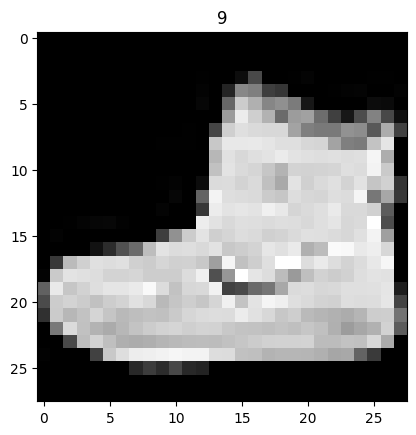

In [ ]:
plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

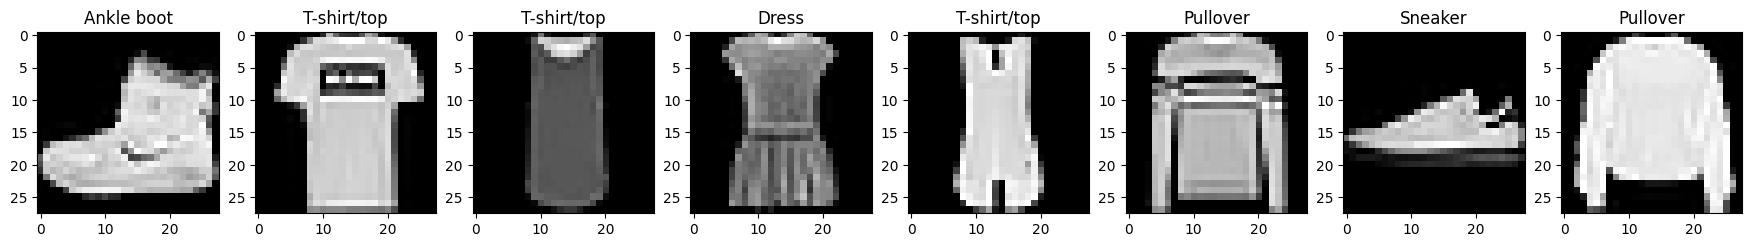

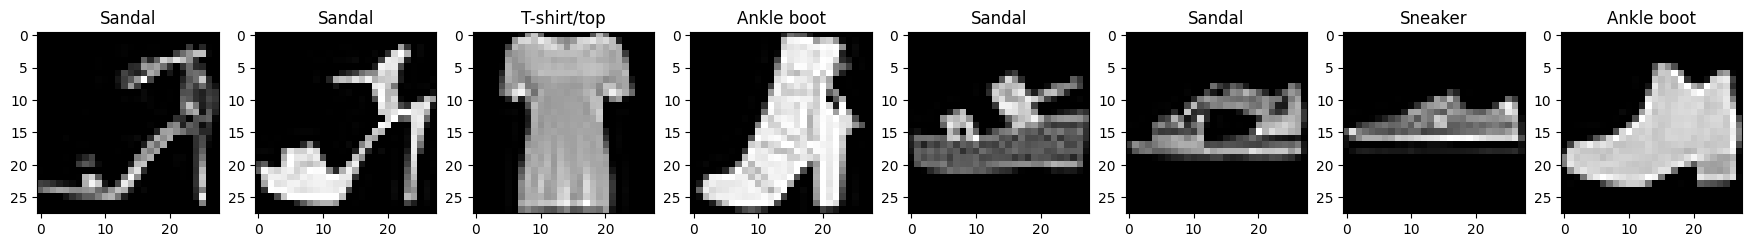

In [ ]:
class_names = ['T-shirt/top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

def show_images(images, labels, ncols=8):
  figure, axs = plt.subplots(figsize=(22,6), nrows=1, ncols=ncols)
  for i in range(ncols):
    axs[i].imshow(images[i], cmap='gray')
    axs[i].set_title(class_names[labels[i]])

show_images(train_images[:8], train_labels[:8], ncols=8)
show_images(train_images[8:16], train_labels[8:16], ncols=8)


## Preprocessing

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def preprocess_images(images, labels):
  # scaling to between 0 and 1
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype = np.float32)

  return images, labels

In [ ]:
train_images, train_labels = preprocess_images(train_images, train_labels)
test_images, test_labels = preprocess_images(test_images, test_labels)

## Models based on Dense Layer

In [ ]:
input_size = 28

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

model = Sequential([
    Flatten(input_shape=(input_size, input_size)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 30)                3030      
                                                                 
 dense_5 (Dense)             (None, 10)                310       
                                                                 
Total params: 81840 (319.69 KB)
Trainable params: 81840 (319.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model's Loss and Optimizer

In [ ]:
# CCE -> *one-hot-encoding!*
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# one-hot encoding
from tensorflow.keras.utils import to_categorical

train_encoded_labels = to_categorical(train_labels)
test_encoded_labels = to_categorical(test_labels)

# from 1d to 2d
print(train_encoded_labels.shape)
print(test_encoded_labels.shape)

(60000, 10)
(10000, 10)


In [ ]:
history = model.fit(x=train_images, y=train_encoded_labels, batch_size=32, epochs =20, verbose=1 )

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.9380 - accuracy: 0.6729
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5972 - accuracy: 0.7841
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5400 - accuracy: 0.8075
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5036 - accuracy: 0.8220
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4755 - accuracy: 0.8314
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4541 - accuracy: 0.8395
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4388 - accuracy: 0.8444
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4260 - accuracy: 0.8480
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4145 - accuracy: 0.8528
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.40

In [ ]:
print([history.history['loss']])

[[0.9380093812942505, 0.5971987843513489, 0.5399639010429382, 0.5036026239395142, 0.47545579075813293, 0.45406585931777954, 0.43884456157684326, 0.42601868510246277, 0.4145101010799408, 0.4065728187561035, 0.39769601821899414, 0.389590322971344, 0.3831917345523834, 0.3759538531303406, 0.3705923557281494, 0.36521172523498535, 0.35939115285873413, 0.35394009947776794, 0.3490028977394104, 0.34374621510505676]]


In [ ]:
print([history.history['accuracy']])

[[0.6729333400726318, 0.7840666770935059, 0.8075166940689087, 0.8220499753952026, 0.8313833475112915, 0.8394666910171509, 0.8443833589553833, 0.8479999899864197, 0.8528333306312561, 0.8558666706085205, 0.8591499924659729, 0.8615000247955322, 0.862583339214325, 0.8662333488464355, 0.8679333329200745, 0.8704666495323181, 0.8711166381835938, 0.8727499842643738, 0.8747000098228455, 0.8766000270843506]]


## Perform Prediction

In [ ]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

313/313 [==============================] - 1s 3ms/step
(10000, 10)


In [ ]:
pred_proba = model.predict(np.expand_dims(test_images[1], axis=0))
print('softmax output:', pred_proba)

1/1 [==============================] - 0s 26ms/step
softmax output: [[6.0675782e-04 1.5793466e-05 9.4813603e-01 3.9236788e-06 8.1781689e-03
  2.2118607e-08 4.3054748e-02 5.1523991e-20 4.5295578e-06 1.9726518e-14]]


In [ ]:
pred = np.argmax(np.squeeze(pred_proba))
print('predicted class value:', pred)

predicted class value: 2


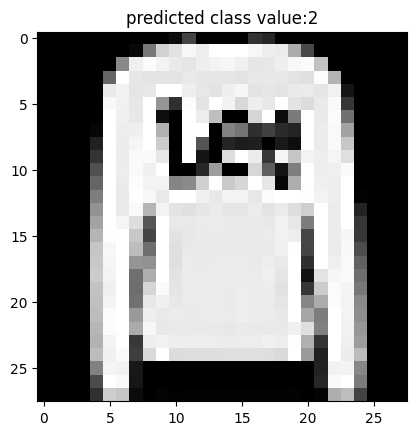

In [ ]:
plt.imshow(test_images[1], cmap='gray')
plt.title(f'predicted class value:{pred}')
plt.show()

## Evaluate the model's performance using test dataset

In [ ]:
model.evaluate(test_images, test_encoded_labels, batch_size=64)

157/157 [==============================] - 1s 3ms/step - loss: 0.3941 - accuracy: 0.8568


[0.39408695697784424, 0.8568000197410583]

## Train with Validation dataset

- monitor overfitting during the training

- Callback : it enables to perform other tasks during the iterations

- Learning rate can be adjusted if the validation dataset loss/accuracy is not improved

In [ ]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

def preprocess_images(images, labels):
  images = np.array(images/255.0, dtype=np.float32)
  labels = np.array(labels, dtype= np.float32)

  return images, labels

In [ ]:
train_images, train_labels = preprocess_images(train_images, train_labels)
test_images, test_labels = preprocess_images(test_images, test_labels)

In [ ]:
# split the existed train data into train and validation dataset
from sklearn.model_selection import train_test_split

tr_images, val_images, tr_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.15, random_state=2021)

In [ ]:
# one-hot encoding
tr_encoded_labels = to_categorical(tr_labels)
val_encoded_labels = to_categorical(val_labels)

In [ ]:
model = Sequential([
    Flatten(input_shape =(input_size, input_size)),
    Dense(100, activation='relu'),
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x=tr_images, y=tr_encoded_labels, batch_size=32, validation_data=(val_images, val_encoded_labels), epochs = 20, verbose=1)

Epoch 1/20
1594/1594 [==============================] - 7s 4ms/step - loss: 0.5354 - accuracy: 0.8112 - val_loss: 0.4313 - val_accuracy: 0.8454
Epoch 2/20
1594/1594 [==============================] - 7s 4ms/step - loss: 0.3900 - accuracy: 0.8603 - val_loss: 0.3922 - val_accuracy: 0.8622
Epoch 3/20
1594/1594 [==============================] - 6s 3ms/step - loss: 0.3505 - accuracy: 0.8719 - val_loss: 0.3579 - val_accuracy: 0.8697
Epoch 4/20
1594/1594 [==============================] - 7s 4ms/step - loss: 0.3267 - accuracy: 0.8812 - val_loss: 0.3680 - val_accuracy: 0.8642
Epoch 5/20
1594/1594 [==============================] - 6s 4ms/step - loss: 0.3041 - accuracy: 0.8883 - val_loss: 0.3439 - val_accuracy: 0.8756
Epoch 6/20
1594/1594 [==============================] - 7s 5ms/step - loss: 0.2912 - accuracy: 0.8920 - val_loss: 0.3331 - val_accuracy: 0.8756
Epoch 7/20
1594/1594 [==============================] - 7s 4ms/step - loss: 0.2785 - accuracy: 0.8962 - val_loss: 0.3264 - val_accuracy:

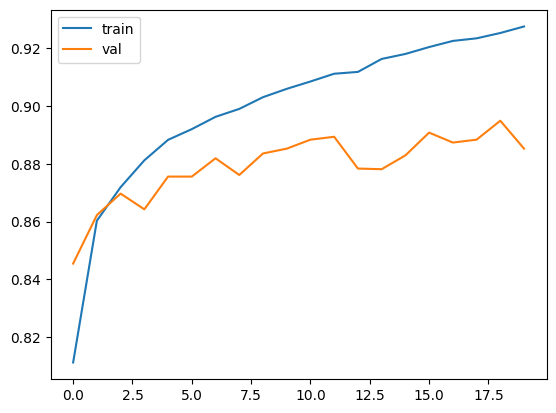

In [ ]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

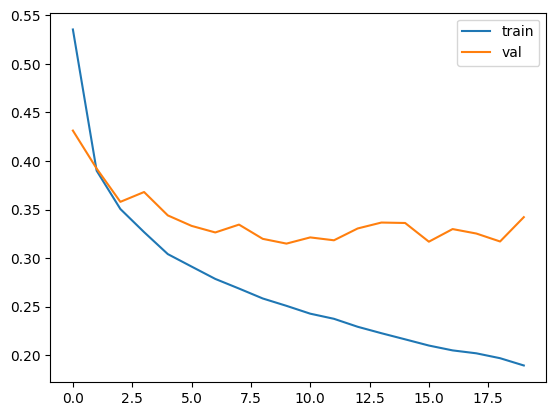

In [ ]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.legend()
plt.show()